**Ultimate Challenge Part 1**

We'll start by importing and exploring the data and then I wil summarize my findings below.

In [144]:
import pandas as pd
import matplotlib as plt
import datetime as dt
%matplotlib inline

data = pd.read_json(r'C:\Users\Pujanande\Desktop\Data\ultimate_challenge\logins.json') #import data
data['login_time'] = pd.to_datetime(data['login_time']) #convert to datetime
data.index = pd.to_datetime(data.login_time) #set as index
data.isnull().sum()

login_time    0
dtype: int64

Looks like we have complete data. After importing the data lets create a dataframe that lists the count of logins for each 15 mnute period.

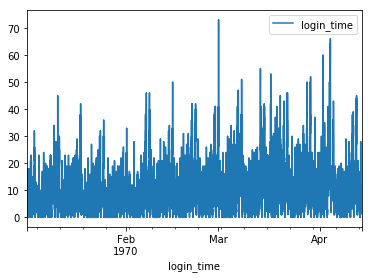

In [145]:
data_2 = data.groupby(pd.TimeGrouper(freq='15Min')).count() #group data by 15 minute intervals and plot counts
data_2.plot()

Now that we have a dataframe with counts for 15 minute intervals we can add in relevant time features.

In [146]:
data_2['period'] = data_2.index #turn the index into a column to extract time features
data_2['month'] = data_2['period'].dt.month #extract month
data_2['weekday'] = data_2['period'].dt.weekday #extract day of week
data_2['hour'] = data_2['period'].dt.hour #extract hour of day

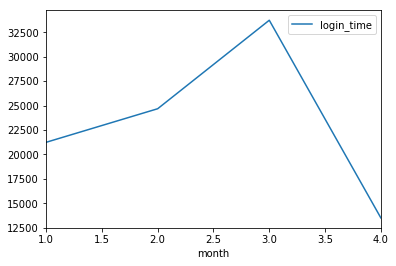

In [147]:
data_2[['login_time','month']].groupby(by='month').sum().plot() #plot sum of log ins each month

The abovegraph shows that there was a steady climb in login's from Jan-Feb, but a drop in April. To see if this drop is real, lets see if we have all of the data for each month.

In [148]:
data_2.index.min()

Timestamp('1970-01-01 20:00:00', freq='15T')

In [149]:
data_2.index.max()

Timestamp('1970-04-13 18:45:00', freq='15T')

The above shows that the data for April is incomplete, with us only having 13 out of 30 days reported. This would explain the drop. To see how logins are really changing we can drop april and just look at the month we ahve full data.

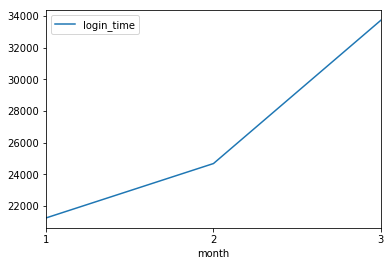

In [150]:
data_3 = data_2[data_2.month < 4]
data_3[['login_time','month']].groupby(by='month').sum().plot(xticks=[1,2,3])

This looks like a steep rise! Lets set the y limit to 0 for amore unbiased picture.

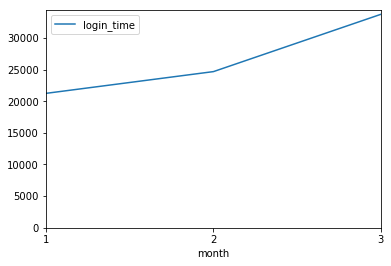

In [151]:
data_3[['login_time','month']].groupby(by='month').sum().plot(xticks=[1,2,3],ylim=0)

Since we have some April data we can see if the increase in logins holds true bu adding another feature to our data.

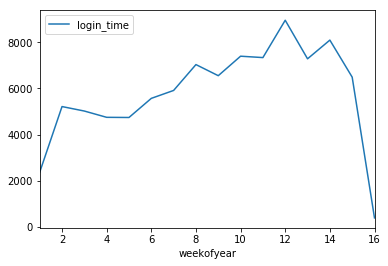

In [152]:
data_2['weekofyear'] = data_2['period'].dt.weekofyear #extract by week of year
data_2[['login_time','weekofyear']].groupby(by='weekofyear').sum().plot()

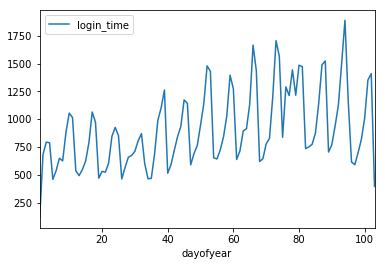

In [153]:
data_2['dayofyear'] = data_2['period'].dt.dayofyear #extract by day of year
data_2[['login_time','dayofyear']].groupby(by='dayofyear').sum().plot()

The drop at the end of the week of year graph can be explained by an incomplete last week. These two graphs show that the holds for the April data we do have. Now that we can say that demand is increasing, lets look at some of the charecteristics of demand.

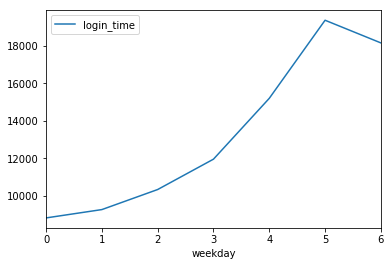

In [154]:
data_2[['login_time','weekday']].groupby(by='weekday').sum().plot()

Demand is higher on Weekends

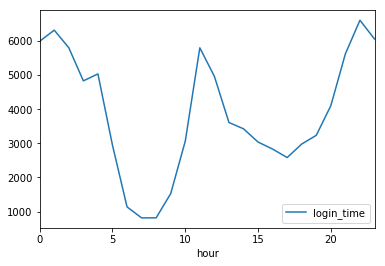

In [155]:
data_2[['login_time','hour']].groupby(by='hour').sum().plot()

Demand is higher at certain times of the day.

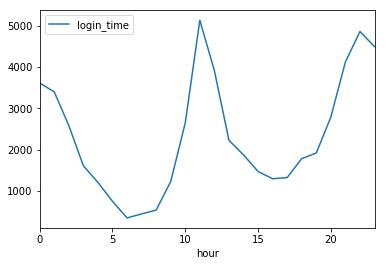

In [156]:
data_4 = data_2[data_2.weekday < 5]
data_4[['login_time','hour']].groupby(by='hour').sum().plot()

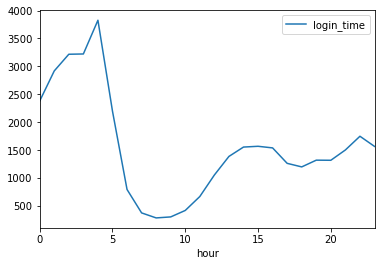

In [157]:
data_5 = data_2[data_2.weekday > 4]
data_5[['login_time','hour']].groupby(by='hour').sum().plot()

Hour of day trend is different on the weekend.

** Summary of findings**

There is a data quality issue since we only have partial data for April. Howevr, given trends in months, week of year, and day of yer, we can conclude that deman is rising. Further, given trends in days of the week and hour of days we can conclude that demand is greater as we approoach the weekend. Finally, demand seems to be higher at specific times of day, specifically, in the early morning, at lunch time, and after dinner during the week. and only in the morning during the weekend. The reasons for the drop in demand at certain times during the week is most likely due to users not logging in during work. During the weekend it appears that they log in in the morning (or stay up late) but then are otherwise busy during the day.